# (1) Astronomical tide prediction from harmonic constants

## Basic equation
$$\eta=H_0 + \sum_{n=1}^N f_n H_n \cos(V_{0n}+u_n+\sigma_n t -\kappa_n)$$

## References
- Hydraulic Engineering Committee (2018) Collection of Hydraulic Formulas 2018, Japan Society of Civil Engineers, 927p. (in Japanese).
- Murakami, K. (1981) The harmonic analysis of tides and tidal currents by least square method and its accuracy, Technical Note of the Port and Harbour Research Institute, 369, 1–38. (in Japanese) <https://ci.nii.ac.jp/naid/40001275093/>
- Ino, K., & Tsuchiya, C. (2022). On the calculation of the tide table. Report of Hydrographic and Oceanographic Researches, 60, 1-15 (in Japanese) <https://www1.kaiho.mlit.go.jp/kenkyu/report/rhr60/rhr60_r_01.pdf>

## Importing libraries

In [2]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tide class

In [3]:
class Tide:
    ω = np.array([0.0410686,0.0821373,0.5443747,1.0158958,1.0980331,12.8542862,
         12.9271398,13.3986609,13.4715145,13.9430356,14.0251729,14.4920521,
         14.5695476,14.9178647,14.9589314,15,15.0410686,15.0821353,
         15.1232059,15.5125897,15.5854433,16.0569644,16.1391017,27.3416964,
         27.4238337,27.8953548,27.9682084,28.4397295,28.5125831,28.9019669,
         28.9841042,29.0662415,29.4556253,29.5284789,29.9589333,30,
         30.0410667,30.0821373,30.5443747,30.626512,31.0158958,42.9271398,
         43.4761563,43.9430356,44.0251729,45.0410686,57.4238337,57.9682084,
         58.4397295,58.9841042,59.0662415,60,60.0821373,86.407938,
         86.9523127,87.4238337,87.9682084,88.0503457,88.9841042,89.0662415])
    table1 = pd.DataFrame(
        data = {
            "constituent":["Sa","SSa","Mm","MSf","Mf","2Q1",
                           "σ1", "Q1", "ρ1", "O1", "MP1", "M1",
                           "Χ1", "π1","P1","S1","K1","ψ1",
                           "ϕ1","θ1","J1","SO1","OO1","OQ2",
                           "MNS2","2N2","μ2","N2","ν2","OP2",
                           "M2","MKS2","λ2","L2","T2","S2",
                           "R2","K2","MSN2","KJ2","2SM2","MO3",
                           "M3","SO3","MK3","SK3","MN4","M4",
                           "SN4","MS4","MK4","S4","SK4","2MN6",
                           "M6","MSN6","2MS6","2MK6","2SM6","MSK6",
                          ],
            "α0":[0,0,0,0,0,1,
                  1,1,1,1,1,1,
                  1,1,1,1,1,1,
                  1,1,1,1,1,2,
                  2,2,2,2,2,2,
                  2,2,2,2,2,2,
                  2,2,2,2,2,3,
                  3,3,3,3,4,4,
                  4,4,4,4,4,6,
                  6,6,6,6,6,6,
                 ],
            "α1":[0,0,1,2,2,-4,
                  -4,-3,-3,-2,-2,-1,
                  -1,0,0,0,0,0,
                  0,1,1,2,2,-5,
                  -5,-4,-4,-3,-3,-2,
                  -2,-2,-1,-1,0,0,
                  0,0,1,1,2,-4,
                  -3,-2,-2,0,-5,-4,
                  -3,-2,-2,0,0,-7,
                  -6,-5,-4,-4,-2,-2,
                 ],
            "α2":[1,2,0,-2,0,1,
                  3,1,3,1,3,1,
                  3,-2,-1,0,1,2,
                  3,-1,1,-1,1,2,
                  4,2,4,2,4,0,
                  2,4,0,2,-1,0,
                  1,2,0,2,-2,3,
                  3,1,3,1,4,4,
                  2,2,4,0,2,6,
                  6,4,4,6,2,4,
                 ],
            "α3":[0,0,-1,0,0,2,
                  0,1,-1,0,0,0,
                  -1,0,0,0,0,0,
                  0,1,-1,0,0,1,
                  1,2,0,1,-1,0,
                  0,0,1,-1,0,0,
                  0,0,-1,-1,0,0,
                  0,0,0,0,1,0,
                  1,0,0,0,0,1,
                  0,1,0,0,0,0,
                 ],
            "α4":[0,0,0,0,0,270,
                 270,270,270,270,90,90,
                 90,193,270,180,90,167,
                 90,90,90,90,90,180,
                 0,0,0,0,0,180,
                 0,0,180,180,283,0,
                 257,0,0,180,0,270,
                 180,270,90,90,0,0,
                 0,0,0,0,0,0,
                 0,0,0,0,0,0,
                ],
            "f":[ "1","1","fMm","fM2","fMf","fO1",
                  "fO1","fO1","fO1","fO1","fM2","fM1",
                  "fJ1","1","1","1","fK1","1",
                  "1","fJ1","fJ1","fO1","fOO1","fO1**2",
                  "fM2**2","fM2","fM2","fM2","fM2","fO1",
                  "fM2","fM2 * fK2","fM2","fL2","1","1",
                  "1","fK2","fM2**2","fK1 * fJ1","fM2","fM2 * fO1",
                  "fM2**(3/2)","fO1","fM2 * fK1","fK1","fM2**2","fM2**2",
                  "fM2","fM2","fM2*fK2","1","fK2","fM2**3",
                  "fM2**3","fM2**2","fM2**2","fM2**2 * fK2","fM2","fM2 * fK2",
                 ],
            "u": [ "0","0","uMm","-uM2","uMf","uO1",
                   "uO1","uO1","uO1","uO1","uM2","uM1",
                   "uJ1","0","0","0","uK1","0",
                   "0","uJ1","uJ1","-uO1","uOO1","uO1**2",
                   "2*uM2","uM2","uM2","uM2","uM2","uO1",
                   "uM2","uM2 + uK2","uM2","uL2","0","0",
                   "0","uK2","2*uM2","uK1 + uJ1","-uM2","uM2 + uO1",
                   "(3/2)*uM2","uO1","uM2+uK1","uK1","2*uM2","2*uM2",
                   "uM2","uM2","uM2 + uK2","0","uK2","3*uM2",
                   "3*uM2","2*uM2","2*uM2","2*uM2 + uK2","uM2","uM2 + uK2",]
        })
    table2 = pd.DataFrame(
        data={
            "constituent":["Mm","Mf", "O1", "K1","J1","OO1","M2","K2"],
            "β0": [1.0000,1.0429,1.0089,1.0060,1.0129,1.1027,1.0004,1.0241],
            "β1": [-0.1300,0.4135,0.1871,0.1150,0.1676,0.6504,-0.0373,0.2863],
            "β2": [0.0013,-0.0040,-0.0147,-0.0088,-0.0170,0.0317,0.0002,0.0083],
            "β3": [0.0000,0.0000,0.0014,0.0006,0.0016,-0.0014,0.0000,-0.0015],
            "γ1": [0.00,-23.74,10.80,-8.86,-12.94,-36.68,-2.14,-17.74],
            "γ2": [0.00,2.68,-1.34,0.68,1.34,4.02,0.00,0.68],
            "γ3": [0.00,-0.38,0.19,-0.07,-0.19,-0.57,0.00,-0.04],

        })
    def __init__(self, L, H, κ, Z0, td, tm, S=-9):
        self.L = L
        self.H = H
        self.κ = κ
        self.Z0 = Z0
        self.td = td
        self.tm = tm
        self.S = S
        Y = td.year
        Dd = (td - datetime(td.year,1,1)).days
        Dm = (tm - datetime(td.year,1,1)).days
        l = (Y + 3) // 4 -500
        self.sd = (211.728 + 129.38471 * (Y - 2000) + 13.176396 * (Dd + l)) % 360
        self.hd = (279.974 - 0.23871   * (Y - 2000) + 0.985647  * (Dd + l)) % 360
        self.pd = (83.298  + 40.66229  * (Y - 2000) + 0.111404  * (Dd + l)) % 360
        self.Nm = (125.071 - 19.32812  * (Y - 2000) - 0.052954  * (Dm + l)) % 360
        self.pm = (83.298  + 40.66229  * (Y - 2000) + 0.111404  * (Dm + l)) % 360
        self.V0 = self.__get_V0()
        self.f, self.u = self.__get_f_u()
    def __get_V0(self):
        V0=[]
        for row in Tide.table1.itertuples():
            _V0 = + row.α0 * self.L \
                  + row.α1 * self.sd \
                  + row.α2 * self.hd \
                  + row.α3 * self.pd \
                  + row.α4
            V0.append(_V0)
        return np.array(V0)
    def __get_f_u(self):
        for row in Tide.table2.itertuples():
            N = np.deg2rad(self.Nm)
            p = np.deg2rad(self.pm)
            _f = row.β0*1\
               + row.β1*np.cos(1*N)\
               + row.β2*np.cos(2*N)\
               + row.β3*np.cos(3*N)
            _u = row.γ1*np.sin(1*N)\
               + row.γ2*np.sin(2*N)\
               + row.γ3*np.sin(3*N)
            exec(f"f{row.constituent} = _f")
            exec(f"u{row.constituent} = _u")
        # L2
        x = 1 - 0.2505 * np.cos(2*p)\
              - 0.1102 * np.cos(2*p-N)\
              - 0.0156 * np.cos(2*p-2*N)\
              - 0.0370 * np.cos(N)
        y = - 0.2505 * np.sin(2*p)\
            - 0.1102 * np.sin(2*p-N)\
            - 0.0156 * np.sin(2*p-2*N)\
            - 0.0370 * np.sin(N)
        fL2 = np.sqrt(x**2 + y**2)
        uL2 = np.rad2deg(np.arctan2(y, x))
        
        # M1
        x = 2 * np.cos(self.pm) + 0.4 * np.cos(self.pm-self.Nm)
        y = 1 * np.sin(self.pm) + 0.2 * np.sin(self.pm-self.Nm)
        fM1 = np.sqrt(x**2 + y**2)
        uM1 = np.rad2deg(np.arctan2(y, x))
        f=[]
        u=[]
        for row in self.table1.itertuples():
            f.append(eval(row.f))
            u.append(eval(row.u))
        return np.array(f), np.array(u)
    def get_tide(self, hours):
        H = np.zeros_like(hours) + self.Z0
        for i in range(len(self.H)):
            H += self.f[i] * self.H[i] * np.cos(np.deg2rad(self.ω[i]*(hours - self.S) + self.V0[i] + self.u[i] - self.κ[i]))
        return H

In [4]:
Tide.table1.head(10)

,constituent,α0,α1,α2,α3,α4,f,u
0,Sa,0,0,1,0,0,1,0
1,SSa,0,0,2,0,0,1,0
2,Mm,0,1,0,-1,0,fMm,uMm
3,MSf,0,2,-2,0,0,fM2,-uM2
4,Mf,0,2,0,0,0,fMf,uMf
5,2Q1,1,-4,1,2,270,fO1,uO1
6,σ1,1,-4,3,0,270,fO1,uO1
7,Q1,1,-3,1,1,270,fO1,uO1
8,ρ1,1,-3,3,-1,270,fO1,uO1
9,O1,1,-2,1,0,270,fO1,uO1


In [5]:
Tide.table2

,constituent,β0,β1,β2,β3,γ1,γ2,γ3
0,Mm,1.0000,-0.1300,0.0013,0.0000,0.00,0.00,0.00
1,Mf,1.0429,0.4135,-0.0040,0.0000,-23.74,2.68,-0.38
2,O1,1.0089,0.1871,-0.0147,0.0014,10.80,-1.34,0.19
3,K1,1.0060,0.1150,-0.0088,0.0006,-8.86,0.68,-0.07
4,J1,1.0129,0.1676,-0.0170,0.0016,-12.94,1.34,-0.19
5,OO1,1.1027,0.6504,0.0317,-0.0014,-36.68,4.02,-0.57
6,M2,1.0004,-0.0373,0.0002,0.0000,-2.14,0.00,0.00
7,K2,1.0241,0.2863,0.0083,-0.0015,-17.74,0.68,-0.04


## Create an instance of the Tide class for the station of Tokyo

In [6]:
# Tokyo
# https://www.data.jma.go.jp/gmd/kaiyou/db/tide/suisan/station.php
lon = 139+46/60+12/3600
Z0 = 120.0
H=[10,1.41,0.85,0.66,0.68,0.58,0.64,4.07,0.75,19.67,
   0.3,0.96,0.25,0.47,8.26,0.87,25.27,0.36,0.23,0.32,
   1.36,0.19,0.77,0.05,0.41,0.9,1.32,7.13,1.4,0.49,
   47.85,0.53,0.47,1.62,1.34,23.71,0.6,6.43,0.08,0.47,
   0.1,0.2,1.17,0.15,0.23,0.51,0.1,0.8,0.17,0.27,
   0.34,0.49,0.26,0.03,0.06,0.01,0.07,0.01,0.01,0.01]
κ=[158.17,159.1,105.33,33.92,130.5,138.17,143.95,150.91,148.95,160.48,
   220.59,167.29,172.11,151.35,176.41,58.81,179.17,201.8,155.44,197,
   192.66,267.78,222.46,73.65,161.27,159.07,166.56,150.22,145.56,0.65,
   153.77,301.57,147.05,165.16,154.84,182.13,353.02,176.47,25.91,5.92,
   352.35,273.53,154.84,288.75,264.19,74.32,63.74,179.56,218.12,277.97,
   261.57,299.8,229.11,62.08,104.39,120.74,162.16,148.66,221.75,221.02]
td = datetime(2023,1,1) # Stat date of the tidal prediction period
tm = datetime(2023,1,15) # Midpoint ob the tidal prediction period
tokyo = Tide(L=lon, H=H, κ=κ, Z0=Z0, td=td, tm=tm, S=9)

## Tidal prediction and plotting

Text(0, 0.5, 'η (cm)')

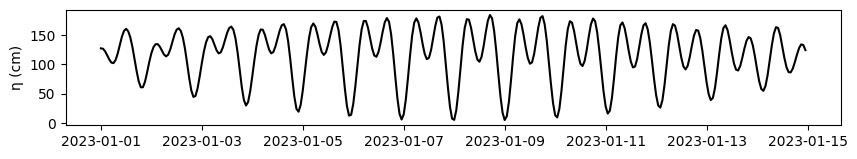

In [7]:
hours = np.arange(24*14, dtype=np.float64) # List of elapsed times from the start of the prediction ([0,1,2,...])
t = [td + timedelta(hours=hour) for hour in hours] # List of prediction times ([2023-01-01T00:00, 2023-01-01T01:00,...])
η = tokyo.get_tide(hours) # Tidal prediction

# plotting
fig, ax = plt.subplots(figsize=(10,1.5))
ax.plot(t, η, c="k") 
ax.set_ylabel("η (cm)")

## Comparison with the predicted values on the JMA website

In [8]:
# Data download
!wget "https://raw.githubusercontent.com/ESEHH-CHHE-JSCE/5-11-Tide/main/TK2023.txt" -O TK2023.txt

--2025-06-05 14:33:23--  https://raw.githubusercontent.com/ESEHH-CHHE-JSCE/5-11-Tide/main/TK2023.txt
Connecting to 10.72.10.106:8080... connected.
200 OKrequest sent, awaiting response... 
Length: 50005 (49K) [text/plain]
Saving to: ‘TK2023.txt’

TK2023.txt          100%[===================>]  48.83K  --.-KB/s    in 0.01s   

2025-06-05 14:33:24 (3.18 MB/s) - ‘TK2023.txt’ saved [50005/50005]



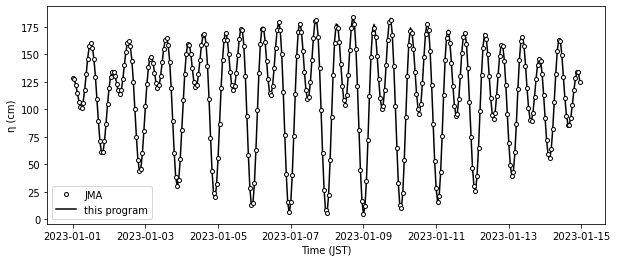

In [29]:
η = tokyo.get_tide(hours)
with open("TK2023.txt") as f: # Loading the predicted values (in text format) from the JMA website
    lines = f.readlines()
η_jma=[]
for line in lines:
    if line[72:76]=="23 1" and int(line[76:78])<15: # Extract data for 14 days from January 1, 2023
        η_jma += [float(line[3*i:3*(i+1)]) for i in range(24)] 
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(t, η_jma, label="JMA", lw=0, marker="o", 
         markeredgecolor="k", markerfacecolor="w",
         markersize=4)
ax.plot(t, η, label="this program", c="k", zorder=0)
#ax.set_xlim(datetime(2023,1,1),datetime(2023,1,15))
ax.set_ylabel("η (cm)")
ax.set_xlabel("Time (JST)")
ax.legend()
plt.savefig("Fig1.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

# (2) Derivation of tidal harmonic constants from one year of observations (Tokyo, 2023)

In [14]:
data=[]
for y in range(2023,2024):
    with open(f"TK{y}.txt") as f:
        lines = f.readlines()
    for line in lines:
        data += [float(line[3*i:3*(i+1)]) for i in range(24)] 
print(len(data)) 

8760


In [10]:
# Tokyo
# https://www.data.jma.go.jp/gmd/kaiyou/db/tide/suisan/station.php
lon = 139+46/60+12/3600
Z0 = 120.0
H=[10,1.41,0.85,0.66,0.68,0.58,0.64,4.07,0.75,19.67,
   0.3,0.96,0.25,0.47,8.26,0.87,25.27,0.36,0.23,0.32,
   1.36,0.19,0.77,0.05,0.41,0.9,1.32,7.13,1.4,0.49,
   47.85,0.53,0.47,1.62,1.34,23.71,0.6,6.43,0.08,0.47,
   0.1,0.2,1.17,0.15,0.23,0.51,0.1,0.8,0.17,0.27,
   0.34,0.49,0.26,0.03,0.06,0.01,0.07,0.01,0.01,0.01]
κ=[158.17,159.1,105.33,33.92,130.5,138.17,143.95,150.91,148.95,160.48,
   220.59,167.29,172.11,151.35,176.41,58.81,179.17,201.8,155.44,197,
   192.66,267.78,222.46,73.65,161.27,159.07,166.56,150.22,145.56,0.65,
   153.77,301.57,147.05,165.16,154.84,182.13,353.02,176.47,25.91,5.92,
   352.35,273.53,154.84,288.75,264.19,74.32,63.74,179.56,218.12,277.97,
   261.57,299.8,229.11,62.08,104.39,120.74,162.16,148.66,221.75,221.02]
td = datetime(2023,1,1)
tm = td + timedelta(days=365//2)
tokyo = Tide(L=lon, H=H, κ=κ, Z0=Z0, td=td, tm=tm, S=9)


119.99987083794414


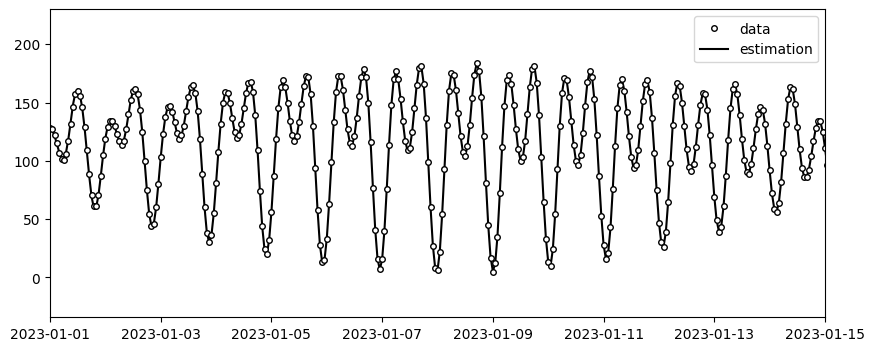

In [11]:
t=np.arange(len(data), dtype=np.float64)
time=[td+timedelta(hours=_t) for _t in t]
M = np.empty((len(data),2*60+1))
M[:,0]=1.0
for i in range(60):
    M[:,2*i+1] = np.cos(np.deg2rad(Tide.ω[i]*t))    
    M[:,2*i+2] = np.sin(np.deg2rad(Tide.ω[i]*t))
x = np.linalg.lstsq(M, data, rcond=None)[0]
print(x[0])
η_est = M @ x
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time, data, label="data", lw=0, marker="o", 
         markeredgecolor="k", markerfacecolor="w",
         markersize=4)
ax.plot(time, η_est, label="estimation", c="k", zorder=0)
ax.set_xlim(datetime(2023,1,1),datetime(2023,1,15))
ax.legend()


In [12]:
fH_est=[]
θ_est=[]
for i in range(60):
    a=x[2*i+1]
    b=x[2*i+2]
    fH_est.append(np.sqrt(a**2+b**2))
    θ_est.append(np.rad2deg(np.arctan2(b, a)))

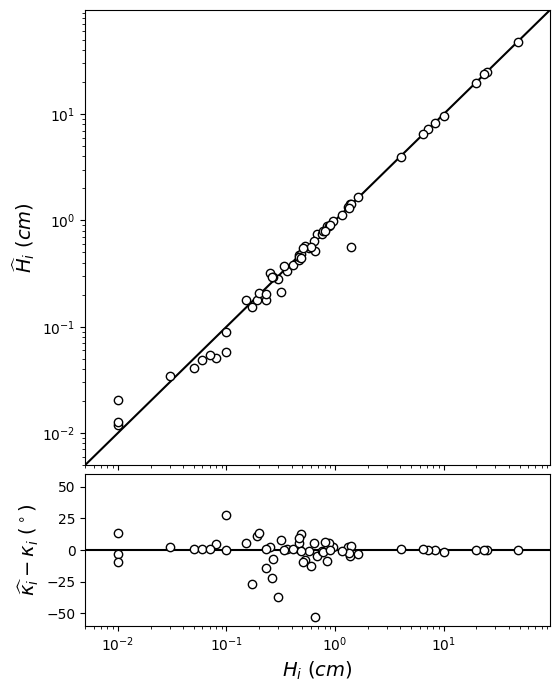

In [13]:
H_est = fH_est/tokyo.f
fig, ax = plt.subplots(2, sharex=True, figsize=(6,8),
                      gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(H, H_est, "k", marker="o", lw=0, markerfacecolor="w")
ax[0].plot([-10,400],[-10,400],"k", zorder=0)
#ax[0].set_aspect(1)
ax[0].set_xlim(np.min(H)/2,np.max(H)*2)
ax[0].set_ylim(np.min(H)/2,np.max(H)*2)
ax[0].loglog()
ax[0].set_ylabel("$\widehat{H}_{i}\ (cm)$", fontdict={"size":14})
ax[0].set_xticklabels([])

def angle_dif0(a, b):
    return ((a-b)+180)%360-180
κ_true = np.array(tokyo.κ)
κ_est = tokyo.V0 + tokyo.u - tokyo.ω * tokyo.S + θ_est
κ_dif = angle_dif0(κ_est, κ_true)
ax[1].plot(H, κ_dif, lw=0, marker="o", 
        markerfacecolor="w", markeredgecolor="k")
ax[1].set_xscale("log")
ax[1].set_xlim(np.min(H)/2,np.max(H)*2)
ax[1].set_ylim(-60,60)
ax[1].axhline(0, c="k", zorder=0)
ax[1].set_xlabel("$H_{i}\ (cm)$", fontdict={"size":14})
ax[1].set_ylabel("$\widehat{\kappa_i} - \kappa_i\ (^\circ)$", fontdict={"size":14})
fig.subplots_adjust(wspace=0, hspace=0.03)
plt.savefig("Fig2.png", dpi=300, bbox_inches='tight', pad_inches=0.1)